In [8]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [9]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/ii-5-20-100-500.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_dist,scaled_ii,detonation
0,4.75,14.47,5-Ton TNT
1,4.75,16.17,5-Ton TNT
2,7.46,10.21,5-Ton TNT
3,7.46,11.58,5-Ton TNT
4,9.49,9.23,5-Ton TNT


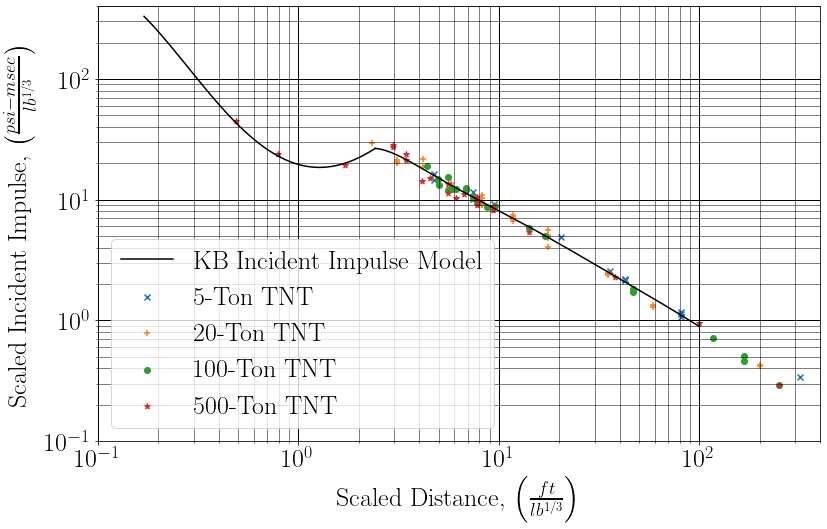

In [10]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,100.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'5-Ton TNT': 'x', '20-Ton TNT': '+', '100-Ton TNT': 'o', '500-Ton TNT': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.detonation==kind]
    plt.scatter(d.scaled_dist, d.scaled_ii,  
                marker = mkr_dict[kind], label=kind)


plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,400)
plt.xlim(0.1,400)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.legend()
#ax.annotate('local max', xy=(2.37, 25), xytext=(4.1, 150),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_ii_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

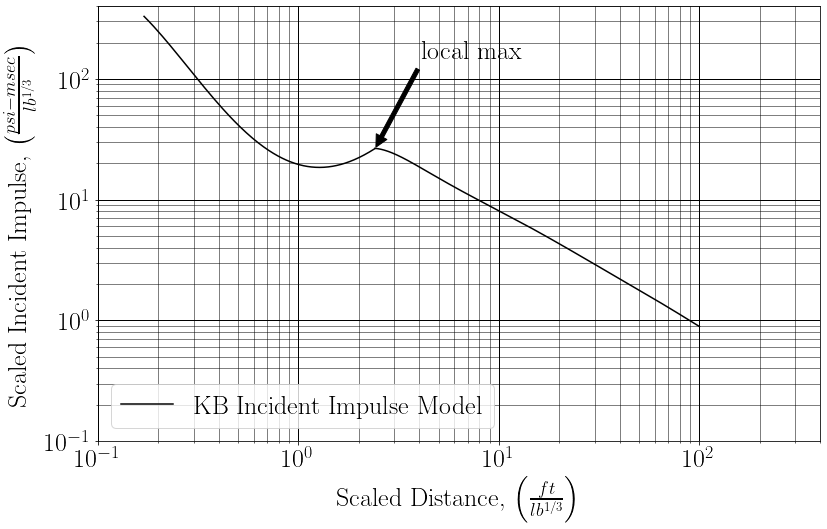

In [11]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,100.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,400)
plt.xlim(0.1,400)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.legend(loc=3)

ax.annotate('local max', xy=(2.37, 25), xytext=(4.1, 150),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

data_path = "5_reports/figures"
file_name = "fig_ii_no_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [12]:
# data points less than a scaled distance of 1
xData = shot_data[shot_data.scaled_dist<=1].scaled_dist
yData = shot_data[shot_data.scaled_dist<=1].scaled_ii

#define a quadratic equation
def func(x, a, b):
    return (a*x**b)

# fit data points to quadratic equation
warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
fittedParameters, pcov = curve_fit(func, xData, yData)
print('Fitted parameters:', fittedParameters)
print()

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

Fitted parameters: [17.67629885 -1.29741265]


RMSE: 0.0
R-squared: 1.0



In [13]:
x = np.arange(2.41,100,0.1)

def func_ii(T2):
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)
    return Y2




yII = func_ii(x)
yLM = func(x, *fittedParameters)
ratio = yII/yLM
times = np.mean(ratio)
print("The KB incident impulse model is %3.2f times greater than a simple power series fitted to the first two data points" % times)

The KB incident impulse model is 15.36 times greater than a simple power series fitted to the first two data points


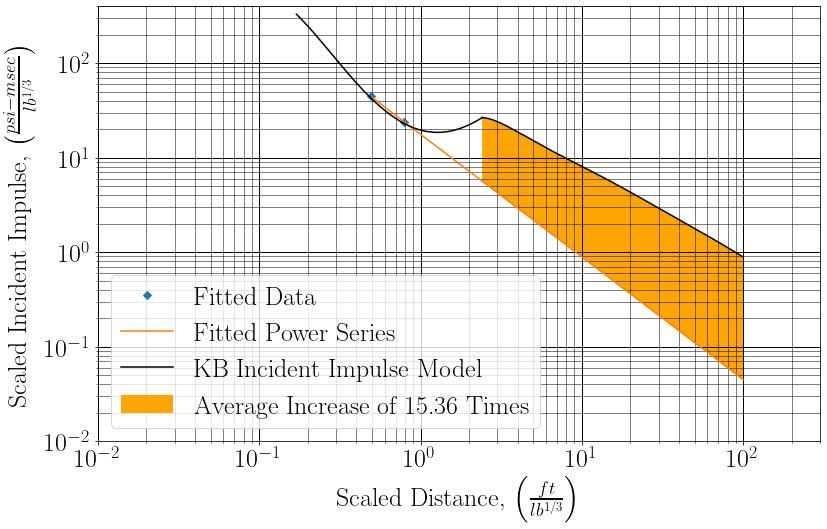

In [14]:
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'5-Ton TNT': 'x', '20-Ton TNT': '+', '100-Ton TNT': 'o', '500-Ton TNT': '*'}
for kind in mkr_dict:
    d = shot_data[shot_data.detonation==kind]
#    ax.scatter(d.scaled_dist, d.scaled_ii,  
#                marker = mkr_dict[kind], label=kind)
#ax.legend()

xModel = np.arange(0.5, 100, .1)
yModel = func(xModel, *fittedParameters)

ax.plot(xData, yData, "D", label="Fitted Data")
ax.plot(xModel, yModel, label="Fitted Power Series")

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.01,400)
plt.xlim(0.01,300)
plt.loglog(T1,Y1,color='black', label="KB Incident Impulse Model");
plt.loglog(T2,Y2,color='black');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
ax.fill_between(x, yII ,yLM, facecolor='orange', label="Average Increase of %3.2f Times" % times)
plt.legend()

data_path = "5_reports/figures"
file_name = "fig_ii_times_larger.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)
plt.show()